# Step 1:Import all the necessary libraries

In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Step 2 Image Preprocessing

In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define image size and batch size
IMG_SIZE = (100, 100)  # Resize all images
BATCH_SIZE = 32

# Data Augmentation & Normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80-20 split
)

# Load Train and Validation Data
train_data = train_datagen.flow_from_directory(
    "fruits_dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    "fruits_dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Get class labels
class_names = list(train_data.class_indices.keys())
print("Classes:", class_names)


Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Classes: ['Apple', 'Banana', 'avocado', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon']


# Step 3 :Model Building

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Helps reduce overfitting
    Dense(len(class_names), activation='softmax')  # Output Layer
])




# Step 4 :Compile the model

In [58]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,733,066 (6.61 MB)

 Trainable params: 1,733,066 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

# Step 5 :Train the model

In [74]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.5181 - loss: 1.2153 - val_accuracy: 0.5674 - val_loss: 1.1548
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.5375 - loss: 1.2545 - val_accuracy: 0.6239 - val_loss: 1.0605
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.5856 - loss: 1.1889 - val_accuracy: 0.5652 - val_loss: 1.1402
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.5849 - loss: 1.1831 - val_accuracy: 0.5717 - val_loss: 1.1403
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.5943 - loss: 1.1812 - val_accuracy: 0.5804 - val_loss: 1.1625
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.5726 - loss: 1.1903 - val_accuracy: 0.6543 - val_loss: 1.0073
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.6117 - loss: 1.0759 - val_accuracy: 0.5826 - val_loss: 1.0794
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.5971 - loss: 1.1321 - val_accuracy: 0.

# Step 6 :Evaluate the model

In [68]:
# Load Test Data
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    "fruits_dataset/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Evaluate Model
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")



Found 1025 images belonging to 10 classes.
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3369 - loss: 2.1126
Test Accuracy: 0.43


# Step 7 Plot the graph

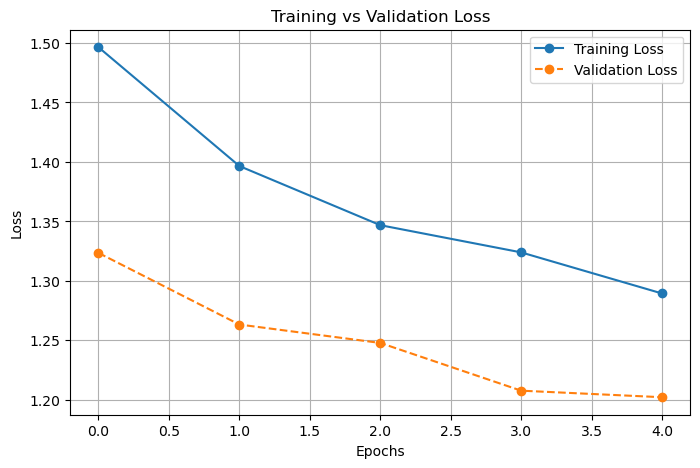

In [72]:
import matplotlib.pyplot as plt

# Extract loss values
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o', linestyle='dashed')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.show()
